<a href="https://colab.research.google.com/github/natashakarmali/nkarmali-uw.edu/blob/master/T_Test_Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set Description

This data was gathered from a Harvard Business Review case study on the Uber Pool offering. The Uber Pool Team was considering whether to increase the time their matching algorithim was allowed to run before assigning a user to a driver and route. The longer the algorithim is allowed to run, the better its able to optimize the user's route and utilization of Uber's seats. The data scientists and product managers on the Uber Pool Team conducted a switch back test to gather data on the outcomes of increasing the algorithim wait time from 2 to 5 minutes. The team speicifcally looked at the affects on cost per trip, number of trips (express pool and pool), cancelations, driver payout, and total matches.

# Purpose

The purpose of this analysis is to test assumptions on how increased wait time affects the above business outcomes and determine whether the difference between the test groups is statistically significant.

# Methods

I will be using a two tailed t-test to determine whether we can reject the null hypothesis. In this analysis, the null hypthosis is: 'The difference between the treated (5 minute wait time) and control (2 minute wait time) groups is not statitisically significant'.

# Analysis

**Importing packages**

In [1]:
#import pandas
import pandas as pd

#import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#numpy contains the mean function
from numpy import mean

#math package contains the math function
from math import sqrt

# scipy in python contains all the statistical tests
from scipy.stats import ttest_ind


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading in dataset**

In [3]:
DF = pd.read_csv("https://raw.githubusercontent.com/natashakarmali/nkarmali-uw.edu/master/switchback.csv")

In [4]:
DF.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express_pool,rider_cancellations,total_driver_payout,total_matches,total_double_matches,total_rides,cost_per_trip
0,Boston,2/19/18 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476,4660,7.394509
1,Boston,2/19/18 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275,3824,7.783564
2,Boston,2/19/18 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962,3546,7.737554
3,Boston,2/19/18 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021,5568,8.081080
4,Boston,2/19/18 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979,3951,6.981512


**Running t-test for each business outcomes of interest using a for loop**

In [5]:
column_names = ["trips_pool", "trips_express_pool", "rider_cancellations", "total_driver_payout", "total_matches", "total_double_matches", "total_rides", "cost_per_trip"]

The results of the independent t-test trips_pool are: 
	difference in mean = {-105.38095238095252}
	p-value = {0.02123239660001577} 
Reject the null hypothesis that the means are equal. Difference between treated and control for trips_pool is statistically significant

The results of the independent t-test trips_express_pool are: 
	difference in mean = {192.28571428571422}
	p-value = {0.02955001543931055} 
Reject the null hypothesis that the means are equal. Difference between treated and control for trips_express_pool is statistically significant

The results of the independent t-test rider_cancellations are: 
	difference in mean = {-24.77777777777777}
	p-value = {0.006580898245756837} 
Reject the null hypothesis that the means are equal. Difference between treated and control for rider_cancellations is statistically significant

The results of the independent t-test total_driver_payout are: 
	difference in mean = {2108.036532063492}
	p-value = {0.02938967017029005} 
Reject the null h

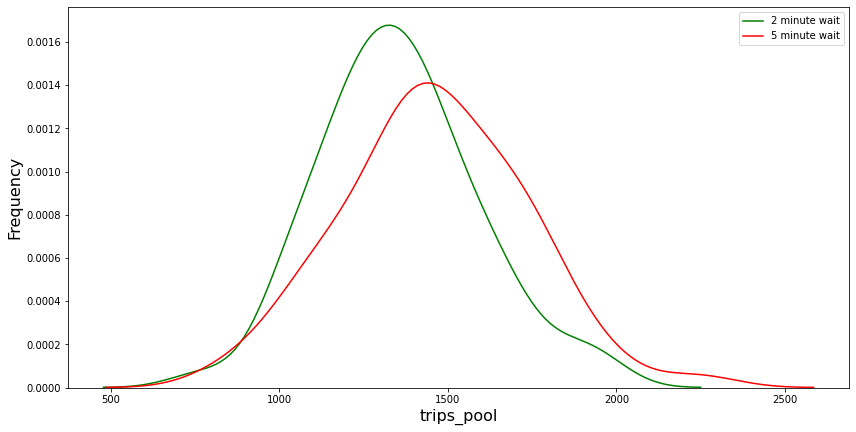

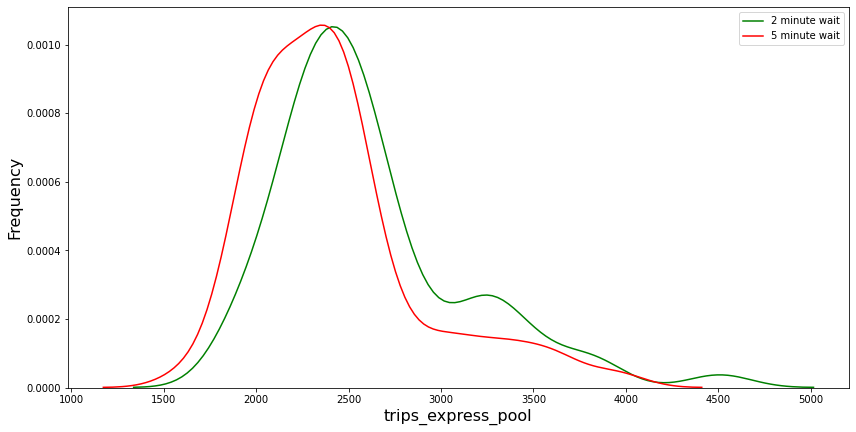

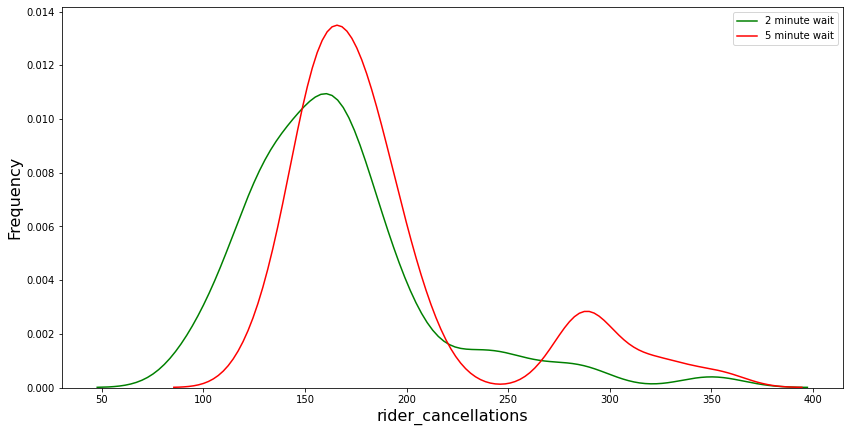

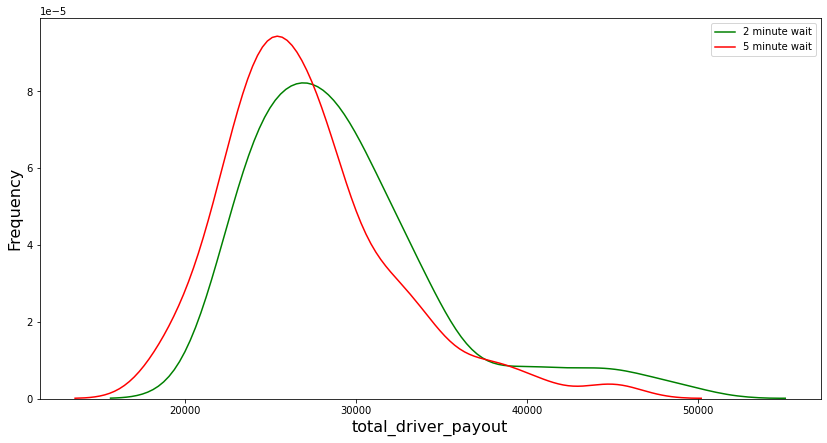

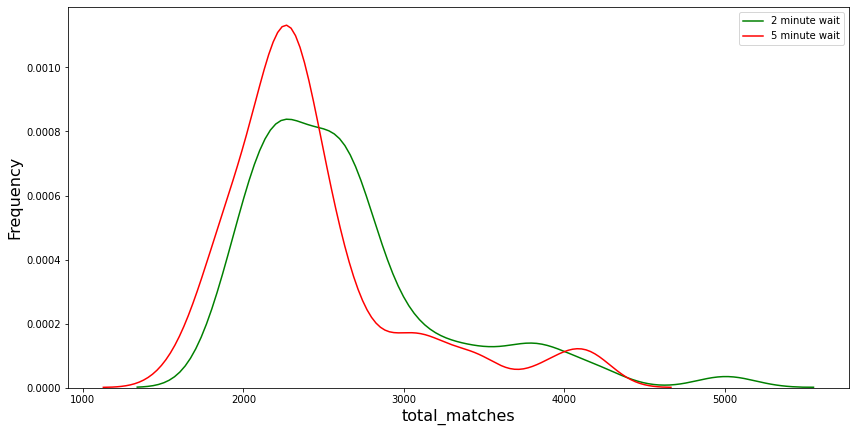

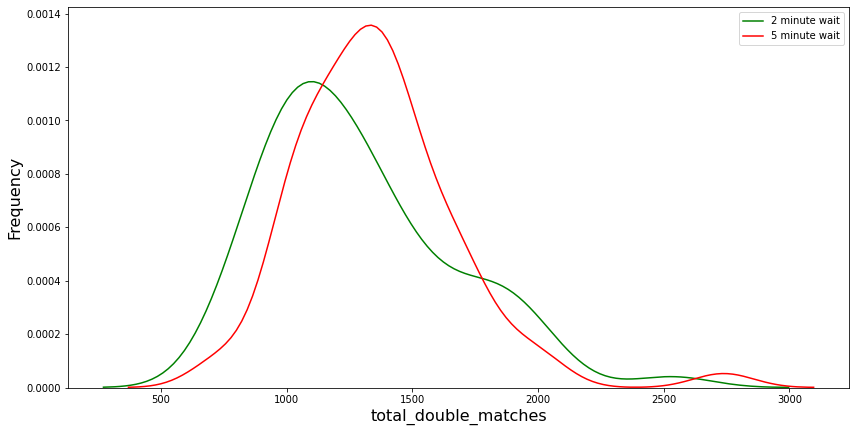

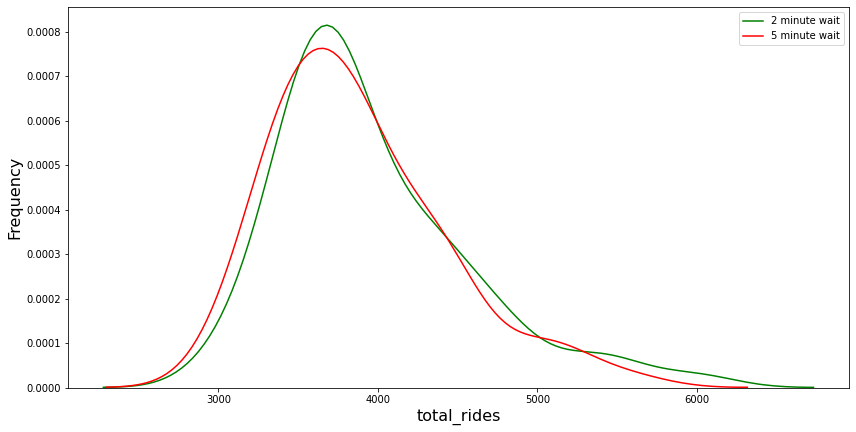

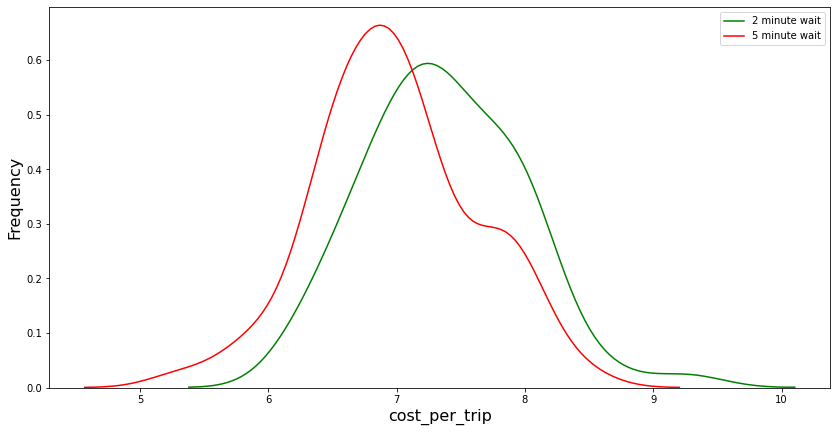

In [6]:
from scipy.stats import ttest_ind
for x in column_names:
  sample_control = DF[DF.wait_time == "2 mins"][[x]]
  sample_treated = DF[DF.wait_time == "5 mins"][[x]]
  fig, ax = plt.subplots(figsize=(14,7))
  ax_control = sns.distplot(sample_control, bins=100, label='2 minute wait',hist=False, color = "g")
  ax_treated = sns.distplot(sample_treated, bins=100, label='5 minute wait',hist=False, color = "r")
  ax.set_ylabel("Frequency",fontsize=16)
  ax.set_xlabel(x, fontsize=16)
  ind_t_test=ttest_ind(sample_control, sample_treated)
  p_val = ind_t_test[1]
  diff_mean = sample_control.mean() - sample_treated.mean()
  output = "The results of the independent t-test " + x + " are: \n\tdifference in mean = {%r}\n\tp-value = {%r} "%(float(diff_mean),float(p_val))
  print(output) 
  alpha = 0.05
  if p_val > alpha:
	  print('Cannot reject the null hypothesis that the means are equal. Difference between treated and control for ' + x + ' is not statistically significant')
  else:
	  print('Reject the null hypothesis that the means are equal. Difference between treated and control for ' + x + ' is statistically significant')
  print()

# Conclusion

Increasing the wait time from two to five minutes causes a signficant increase in trips (for both pool and express) and driver payout. These are both positive outcomes. Unfortunately, there was also a significant increase in cancelations and cost per trip. There was not a significant difference in total matches and total rides. 

Most noteably, there was a very low p-value (0.001) for cost per trip and rider cancelations (0.01) indicating strong evidence that increased wait time had a negative impact on both of these buisness outcomes. Because these were two main KPIs for sucess of Uber Pool, the results seem to indicate that the benefit of letting the algorithim run longer is not worth the cost and poor user experience. 